In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')

# ESTUDIOS DE CASOS DE MODELOS ANALITICOS
## De qué trata la Ciencia de Datos?
Sin dudas, la Ciencia de Datos es una disciplina transversal a múltiples industrias, como ser por ejemplo: Finanzas, Retail, Automotriz, Logística, Turismo, etc. 
A lo largo de esta sesión, indagaremos sobre algunos Casos de Éxitos basados en diversas industrias de aplicación.

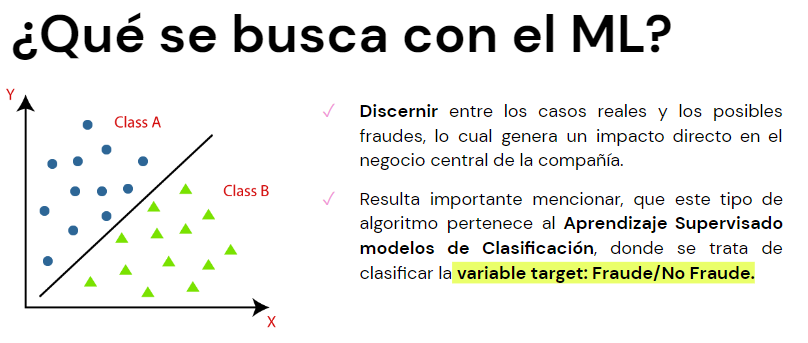

## Fases importantes para la resolución de Casos en DS
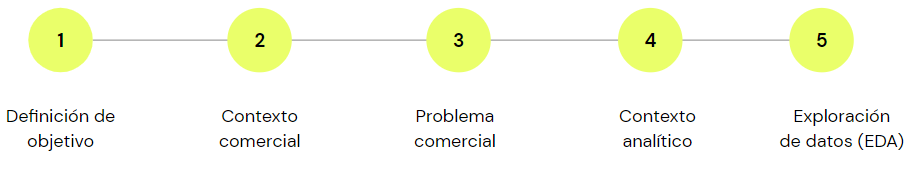
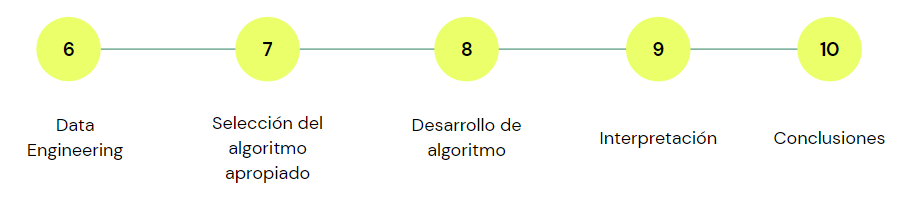

# CASOS PRÁCTICOS
## Empresa de seguros
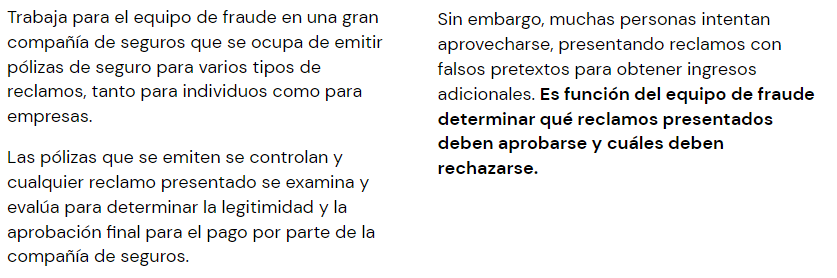

¿Existen patrones particulares en los grupos de reclamos presentados que puedan ser indicativos de fraude?

In [2]:
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
data = pd.read_excel('../datasets/clase9/insurance_data_1000.xlsx')
data.head()

,case_id,income,age,sex,approval,fraud,claims
0,59982,35750.95,42,M,Approved,Under Review,9518.95
1,87249,24078.27,19,M,Denied,No,19354.23
2,50406,39241.52,37,M,Denied,Fraud,13056.04
3,59391,33248.31,26,M,Approved,No,19238.37
4,96622,38649.96,54,M,Approved,No,14427.42


In [6]:
# Saber cuantas categorias hay en la columna fraud
data['fraud'].value_counts()

No              830
Fraud           115
Under Review     55
Name: fraud, dtype: int64

In [4]:
# Elegimos las columnas necesarias
df = data[['case_id', 'income', 'age', 'claims']]
df.head()

,case_id,income,age,claims
0,59982,35750.95,42,9518.95
1,87249,24078.27,19,19354.23
2,50406,39241.52,37,13056.04
3,59391,33248.31,26,19238.37
4,96622,38649.96,54,14427.42


In [7]:
# Elegimos la columna fraud que esten bajo revision en otro dataset
df_frauds = data[data['fraud'] == 'Under Review']
df_frauds.head()

,case_id,income,age,sex,approval,fraud,claims
0,59982,35750.95,42,M,Approved,Under Review,9518.95
32,41732,35560.99,19,F,Approved,Under Review,10186.46
70,36988,27844.16,39,F,Approved,Under Review,15780.98
120,95015,37497.02,6,F,Approved,Under Review,16686.35
128,2910,29806.83,43,F,Approved,Under Review,16373.62


<Figure size 576x432 with 0 Axes>

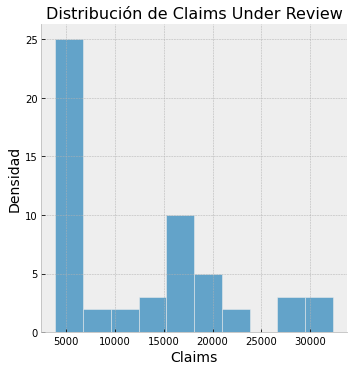

In [13]:
x = df_frauds['claims']

# Histograma
plt.figure(figsize=(8,6))
sns.displot(x, bins=10, kde=False)  # kde muestra la linea distribución suavizada
plt.title('Distribución de Claims Under Review', fontsize=16)
plt.xlabel('Claims', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.show()

El monto del seguro con más reclamos es de $5000

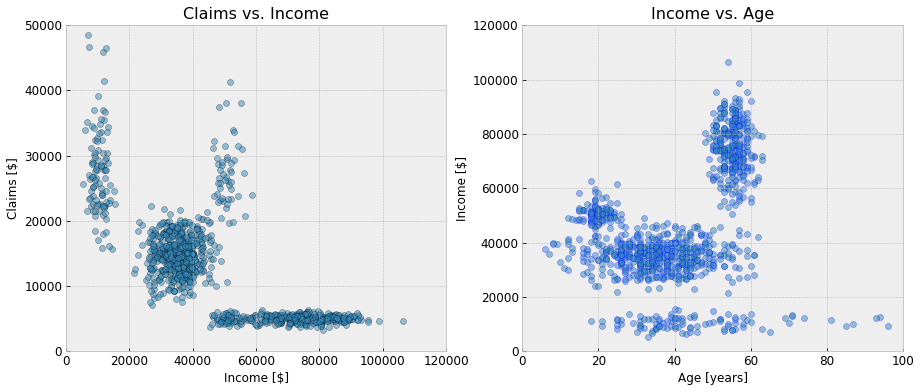

In [11]:
# Claims vs. Income
plt.figure(figsize=(15,6))
plt.subplot(121)  # 121 = 1 fila 2 columnas, grafica 1

# Hacemos un scatter plot
plt.scatter(df['income'], df['claims'], edgecolor='k', alpha=0.5)
plt.ylim(0, 50000)
plt.yticks(fontsize=12)
plt.ylabel('Claims [$]', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0, 120000)
plt.xlabel('Income [$]', fontsize=12)
plt.title('Claims vs. Income', fontsize=16)

# Income vs Age
plt.subplot(122)  # 121 = 1 fila 2 columnas, grafica 2
plt.scatter(df['age'], df['income'], edgecolor='b', alpha=0.5)
plt.xlim(0, 100)
plt.xlabel('Age [years]', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 120000)
plt.ylabel('Income [$]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Income vs. Age', fontsize=16)
plt.show()

* Las personas que tienen menor ingreso reclaman más dinero y mientras más ingresos tienen menos reclaman.
* Los que más ingresos tienen tienen mayor edad.

In [14]:
df_gender = data[['case_id', 'income', 'age', 'claims', 'sex']]
df_gender.head()

,case_id,income,age,claims,sex
0,59982,35750.95,42,9518.95,M
1,87249,24078.27,19,19354.23,M
2,50406,39241.52,37,13056.04,M
3,59391,33248.31,26,19238.37,M
4,96622,38649.96,54,14427.42,M


In [15]:
df_gender['sex'].value_counts()

F    507
M    493
Name: sex, dtype: int64

In [16]:
df_male = df_gender[df_gender['sex'] == 'M']
df_female = df_gender[df_gender['sex'] == 'F']

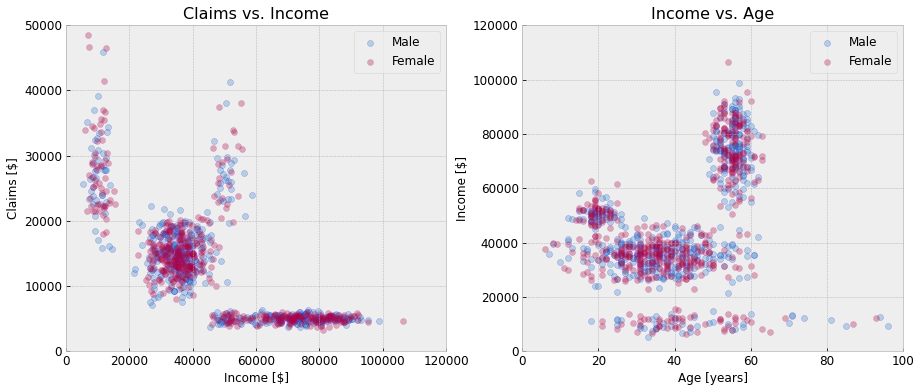

In [19]:
plt.figure(figsize=(15,6))

# Claims vs. Income - con base a genero
plt.subplot(121)
plt.scatter(df_male['income'], df_male['claims'], edgecolor='b', alpha=0.3, label='Male')
plt.scatter(df_female['income'], df_female['claims'], edgecolor='m', alpha=0.3, label='Female')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 120000)
plt.xlabel('Income [$]', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 50000)
plt.ylabel('Claims [$]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Claims vs. Income', fontsize=16)

# Income vs. Age - según genero
plt.subplot(122)
plt.scatter(df_male['age'],df_male['income'], edgecolor='b', alpha=0.3, label='Male')
plt.scatter(df_female['age'],df_female['income'], edgecolor='m', alpha=0.3, label='Female')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 100)
plt.xlabel('Age [years]', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 120000)
plt.ylabel('Income [$]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Income vs. Age', fontsize=16)
plt.show()

No existe diferencia significativa al separar por género

In [20]:
df.describe()

,case_id,income,age,claims
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,49398.477000,46311.21647,40.724000,13251.096220
std,29094.953739,21933.34218,14.534134,8096.348306
min,134.000000,5268.52000,6.000000,3319.640000
25%,22955.000000,32657.14000,29.000000,5335.892500
50%,49600.000000,39423.52000,41.000000,13105.235000
75%,75392.000000,65959.10500,54.000000,17302.632500
max,99992.000000,106450.39000,96.000000,48487.000000


* Los ingresos van desde 5268 hasta 106450, con una media de 39423.
* La edad va desde 6 (posible outliers) hasta 96, con una media de 41.

In [21]:
# Formula de escala de valores entre 0 y 1
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)
    return result

In [22]:
df_norm = normalize(df[['age', 'income', 'claims']])
df_norm.head()

,age,income,claims
0,0.400000,0.301264,0.137252
1,0.144444,0.185900,0.355004
2,0.344444,0.335762,0.215563
3,0.222222,0.276530,0.352439
4,0.533333,0.329915,0.245925


In [23]:
df_norm.describe()

,age,income,claims
count,1000.000000,1000.000000,1000.000000
mean,0.385822,0.405633,0.219881
std,0.161490,0.216771,0.179252
min,0.000000,0.000000,0.000000
25%,0.255556,0.270687,0.044640
50%,0.388889,0.337560,0.216652
75%,0.533333,0.599817,0.309582
max,1.000000,1.000000,1.000000


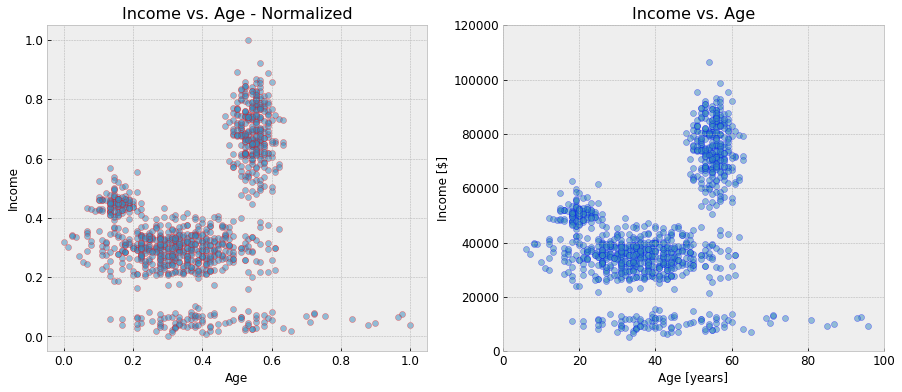

In [24]:
plt.figure(figsize=(15,6))

# Claims vs. Income - Normalizados
plt.subplot(121)
plt.scatter(df_norm['age'], df_norm['income'], edgecolor='r', alpha=0.5)
#plt.xlim(-0.05, 1.05)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=12)
#plt.ylim(-0.05, 1.05)
plt.ylabel('Income', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Income vs. Age - Normalized', fontsize=16)


# Income vs Age
plt.subplot(122)
plt.scatter(df['age'], df['income'], edgecolor='b', alpha=0.5)
plt.xlim(0, 100)
plt.xlabel('Age [years]', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 120000)
plt.ylabel('Income [$]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Income vs. Age', fontsize=16)
plt.show()

In [27]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(df_norm)

KMeans(n_clusters=4)

In [28]:
labels = kmeans.predict(df_norm)
labels

array([3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3,
       3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3,
       3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2,

In [29]:
centroids = kmeans.cluster_centers_
centroids

array([[0.43997709, 0.05063728, 0.54749975],
       [0.54697139, 0.69022897, 0.03759993],
       [0.18081565, 0.36183186, 0.26718021],
       [0.38968018, 0.29001047, 0.2498347 ]])

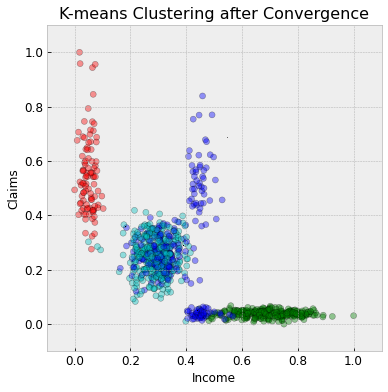

In [30]:
# Graficar la data 
plt.figure(figsize=(6, 6))
color_map = {1:'r', 2:'g', 3:'b' , 4:'c', 5:'y', 6:'w'}
colors = [color_map[x+1] for x in labels]

plt.scatter(df_norm['income'], df_norm['claims'], color=colors, alpha=0.4, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, marker='*', edgecolor='k')

plt.xlim(-0.1, 1.1)
plt.xlabel('Income', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-0.1, 1.1)
plt.ylabel('Claims', fontsize=12)
plt.yticks(fontsize=12)
plt.title('K-means Clustering after Convergence', fontsize=16)
plt.show()

In [31]:
df_norm['cluster'] = labels
df_norm.head()

,age,income,claims,cluster
0,0.400000,0.301264,0.137252,3
1,0.144444,0.185900,0.355004,2
2,0.344444,0.335762,0.215563,3
3,0.222222,0.276530,0.352439,2
4,0.533333,0.329915,0.245925,3


In [32]:
df_norm['cluster'].value_counts()

3    336
1    299
2    268
0     97
Name: cluster, dtype: int64

In [33]:
df_norm['cluster'].value_counts(normalize=True) * 100

3    33.6
1    29.9
2    26.8
0     9.7
Name: cluster, dtype: float64

In [34]:
sum_sq_d = []
K = range(1, 11)
print(K)

for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df_norm[['income', 'claims']])
    sum_sq_d.append(km.inertia_)
    # La inercia es el error que se comete, distancia entre cada punto y su centroide.

print(sum_sq_d)

range(1, 11)
[79.04209525971282, 27.40326584272819, 15.48846811620044, 11.13694651674209, 7.697518747123247, 6.383110311575329, 5.109486116078596, 4.136963346814821, 3.5690887643337215, 3.1984233495372383]


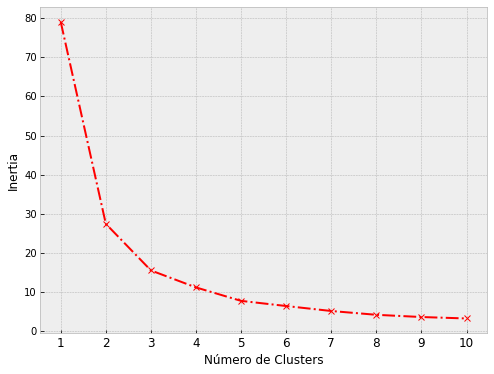

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(K, sum_sq_d, 'rx-.')
plt.xlabel('Número de Clusters')
plt.xticks(range(1, 11), fontsize=12)
plt.ylabel('Inertia')
plt.show()

A mayor numero de clusters se reduce la inercia (error), pero a partír de 4 cluster ya no hay un gran cambio.

### INTERPRETACION DE LOS RESULTADOS
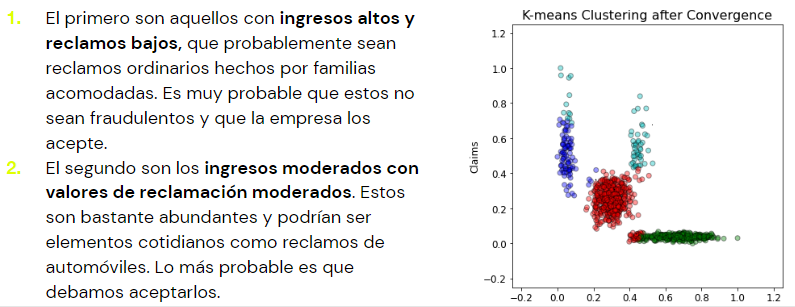
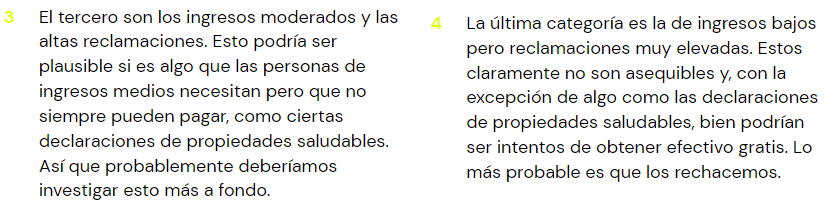

### CONCLUSION
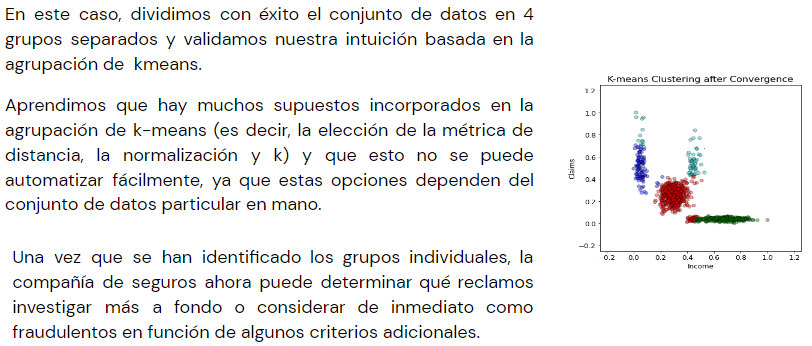

## Accidentes en Nueva York
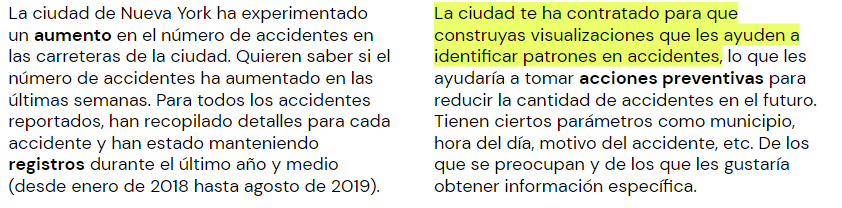
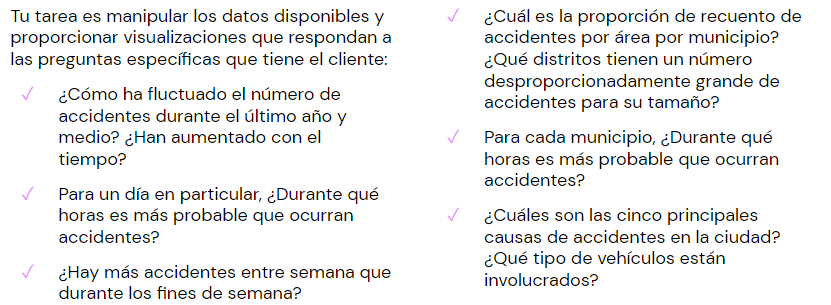

In [37]:
data = pd.read_csv('../datasets/clase9/accidents.csv', delimiter=';')
data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATE                           238522 non-null  object 
 1   TIME                           238522 non-null  object 
 2   BOROUGH                        238522 non-null  object 
 3   ZIP CODE                       238452 non-null  float64
 4   LATITUDE                       231544 non-null  float64
 5   LONGITUDE                      231544 non-null  float64
 6   ON STREET NAME                 153918 non-null  object 
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64  
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64  
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64  
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64  
 11  NUMBER OF MOTORIST INJURED     238522 non-null  int64  
 12  NUMBER OF MOTORIST KILLED     

In [40]:
# Convertir DATE a formato fecha
data['DATE'] = pd.to_datetime(data['DATE'])

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATE                           238522 non-null  datetime64[ns]
 1   TIME                           238522 non-null  object        
 2   BOROUGH                        238522 non-null  object        
 3   ZIP CODE                       238452 non-null  float64       
 4   LATITUDE                       231544 non-null  float64       
 5   LONGITUDE                      231544 non-null  float64       
 6   ON STREET NAME                 153918 non-null  object        
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64         
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64         
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64         
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64         
 11  

<AxesSubplot:xlabel='DATE'>

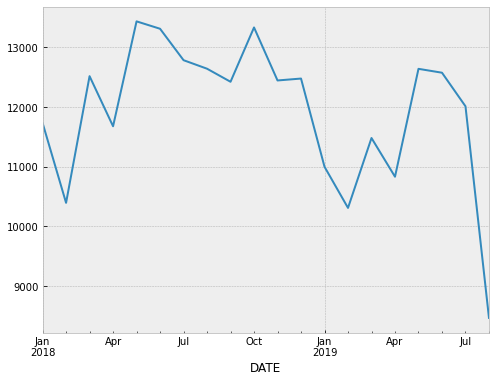

In [46]:
# Agrupar por mes
monthly_accidents = data.groupby(data['DATE'].dt.to_period('M')).size()
monthly_accidents.plot.line(figsize=(8, 6))

<AxesSubplot:xlabel='DATE'>

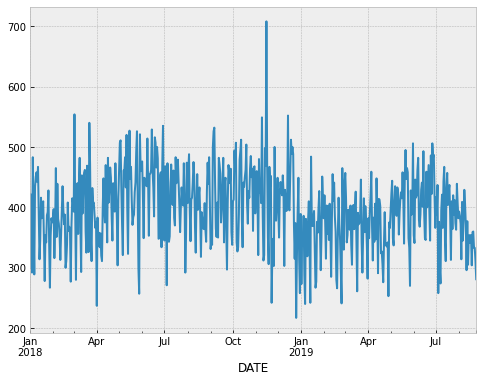

In [47]:
# Agrupar por día
monthly_accidents = data.groupby(data['DATE'].dt.to_period('D')).size()  # size hace un conteo
monthly_accidents.plot.line(figsize=(8, 6))

In [48]:
# Convertir TIME a formato hora
data['TIME'] = pd.to_datetime(data['TIME'])
data['HOUR'] = data['TIME'].dt.hour

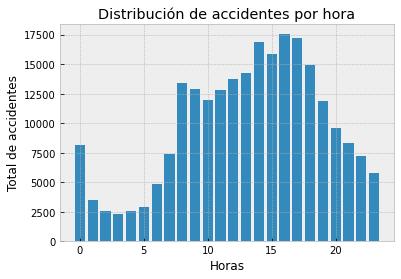

In [49]:
# Agrupar por hora
hourly_accidents = data.groupby('HOUR').size()
plt.bar(hourly_accidents.index, hourly_accidents.values)
plt.title('Distribución de accidentes por hora')
plt.xlabel('Horas')
plt.ylabel('Total de accidentes')
plt.show()

Se producen más accidentes entre las 2 y 6 de la tarde.

<AxesSubplot:xlabel='WEEKDAY'>

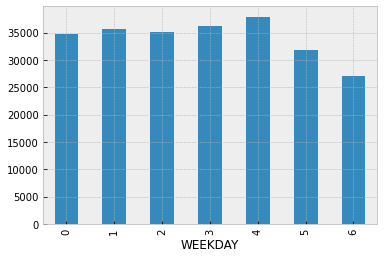

In [50]:
# Agrupar por día de la semana
data['WEEKDAY'] = data['DATE'].dt.weekday
weekday_accidents = data.groupby('WEEKDAY').size()
weekday_accidents.plot.bar()

Hay menos accidentes los fines de semana y mayor cantidad de accidentes el Viernes.

<AxesSubplot:xlabel='BOROUGH'>

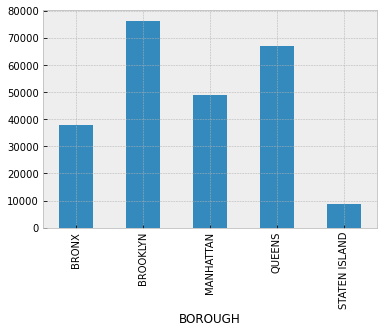

In [52]:
# Agrupar por municipio
boroughs = data.groupby('BOROUGH').size()
boroughs.plot.bar()

CONCLUSION: Se producen más accidentes entre las 2 y las 6 de la tarde, los viernes, en Brooklyn y Queens.